# Библиотеки

In [14]:
from zlib import crc32

import numpy as np
import pandas as pd
import scipy.stats as st
from itertools import combinations
import matplotlib.pyplot as plt

from  statsmodels.stats.weightstats import ttest_ind

from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Код генерации выборки

In [15]:
import re
EMAIL_REGEX = re.compile(r"[^@]+@phystech.edu")

def generate_dataset(code):
    rs = np.random.RandomState(code)
    size = rs.randint(low=5, high=10)
    data = rs.randn(30, size)
    for i in range(size):
        data[:, i] += rs.uniform()*2-1.0
    return data

# Генерация выборки для вашей почты

<span style="color:red">
    ВАЖНО!
    Почта, которую укажете ниже и почта с которой Вы отправляете домашнее задание должна совпадать!
    В момент проверки задания алгоритм генерирует выборку на основе почты из анкеты!
</span>

Внимательно проверьте почту для которой выполняется задание!

In [16]:
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
assert EMAIL_REGEX.match(task['mail']), 'Not a mail in the phystech.edu domain'
task['id'] = crc32(task['mail'].encode('utf-8'))
task['data'] = generate_dataset(task['id'])

task

Enter your mail: a.alchymbaev@phystech.edu


{'data': array([[ 4.63571037e-02, -1.49291197e+00, -4.03276519e-01,
          2.17196694e+00, -1.65095900e+00,  5.62074718e-01,
          6.76812356e-01],
        [ 3.03942307e-01, -3.21259509e-01, -8.73760053e-01,
          4.13855583e-01,  3.92858814e-02,  9.92657996e-01,
         -3.12019719e-01],
        [-4.14414046e-01, -1.23540605e+00, -1.30835030e+00,
          9.02164263e-01, -7.96839795e-01,  1.35072430e+00,
          4.28490275e-01],
        [-2.38448494e+00, -9.52052770e-01, -4.20129703e-01,
         -6.16694817e-01,  5.54963307e-02, -1.16533755e-01,
          5.36390819e-01],
        [ 1.39423382e+00, -5.97915173e-01, -1.89792942e+00,
         -5.46831399e-01, -3.42997793e-01, -3.46508208e-01,
         -6.52596219e-01],
        [ 2.92371953e-01,  3.51208607e-01, -1.18865931e+00,
          6.55316101e-01, -5.11169117e-01,  5.46560690e-01,
          1.17636132e+00],
        [-1.09715279e+00, -5.99616567e-01, -7.76586358e-01,
          6.21093804e-01, -1.49829489e+00,  7.6361

# Работа с выборкой

In [17]:
data = task['data']


In [ ]:
# to be continued...

In [18]:
new_data = data.T
new_data


array([[ 4.63571037e-02,  3.03942307e-01, -4.14414046e-01,
        -2.38448494e+00,  1.39423382e+00,  2.92371953e-01,
        -1.09715279e+00, -3.98414638e-01,  7.83207455e-01,
        -9.54027654e-01,  8.63423407e-01,  9.09831596e-01,
         7.64458561e-01, -1.09029871e+00, -7.07361102e-01,
        -2.15220781e-01,  4.70228994e-03,  5.66065261e-01,
         1.60047359e+00,  9.86851328e-01,  1.90924915e-01,
         9.27749210e-01,  6.25063196e-01, -3.56867942e-01,
         1.92681156e+00,  1.40595359e+00,  1.46096287e+00,
         1.51748614e-01,  7.44653856e-02,  1.15063562e+00],
       [-1.49291197e+00, -3.21259509e-01, -1.23540605e+00,
        -9.52052770e-01, -5.97915173e-01,  3.51208607e-01,
        -5.99616567e-01, -1.00479958e+00, -8.76380382e-01,
         2.98679514e-01, -5.18572594e-02, -1.54587211e+00,
         2.45953753e-02,  6.53449529e-01, -6.63500633e-01,
        -2.10794469e+00,  9.89610222e-03,  8.98612148e-01,
         1.53755215e+00, -1.16787781e+00, -4.01655100e-

In [29]:
def test(data):
    rejections, p_values = 0, []
    for x, y in combinations(data, 2):
        p_value = st.ttest_ind(x, y)[1]
        p_values.append(p_value)
        rejections += p_value <= 0.05
    return rejections, p_values

Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего?

In [31]:
print('Rejections =', test(new_data)[0])

Rejections = 14


Значение уровня значимости при использовании поправки Бонферрони (alpha=0.05)

In [35]:
print('P_value_with_Bonferroni = {:.3f}'.format(multipletests(test(new_data)[1], method='bonferroni')[-1])) 

P_value_with_Bonferroni = 0.002


Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего при использовании поправки Бонферрони?

In [34]:
print('Rejections_with_Bonferroni =', multipletests(test(new_data)[1], method='bonferroni')[0].sum())

Rejections_with_Bonferroni = 10


Для какого количества пар из столбцов отвергается гипотеза о совпадении среднего при использовании метода Холма?

In [36]:
print('Rejections_with_Holm =', multipletests(test(new_data)[1], method='holm')[0].sum())

Rejections_with_Holm = 12


Оценка m0 по методу Шведера-Спьётволла (lambda = 0.5)


In [40]:
lambda_ = 0.5
print('m0 = {:.3f}'.format((sum([1 for x in test(new_data)[1] if x > lambda_]) + 1) / (1 - lambda_)))

m0 = 4.000


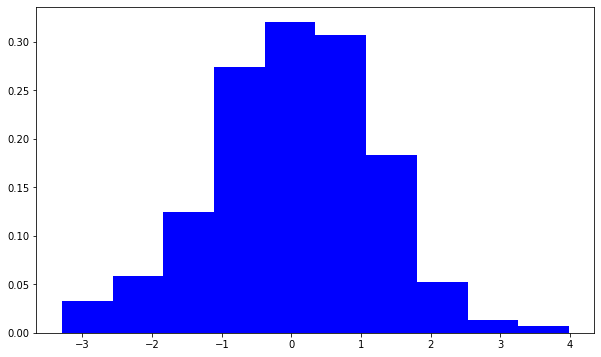

In [44]:
plt.figure(figsize = (10, 6))
plt.hist(data.flatten(), color='b', density=True)
None

In [45]:
l = 0
p_values = []
for x in data:
  p_value = st.shapiro(x)[1]
  p_values.append(p_value)
  l += (p_value < 0.05)
l, p_values   

(3,
 [0.7354040741920471,
  0.9729140400886536,
  0.4380778968334198,
  0.41552814841270447,
  0.12525413930416107,
  0.5230814218521118,
  0.27479860186576843,
  0.1478266716003418,
  0.35197004675865173,
  0.2724438011646271,
  0.6535458564758301,
  0.9544719457626343,
  0.5019053220748901,
  0.35196763277053833,
  0.0685914009809494,
  0.25853660702705383,
  0.00012847692414652556,
  0.5470548272132874,
  0.4018869400024414,
  0.6852545142173767,
  0.21257905662059784,
  0.5445436835289001,
  0.7075113654136658,
  0.807151198387146,
  0.17930792272090912,
  0.026285655796527863,
  0.7505186200141907,
  0.6160848736763,
  0.5522127747535706,
  0.01648186706006527])